
# Project 0 - Pytorch for linear algebra

## Brief
* Due:
  * 09/01/2020 11:59PM

* Hand-in: through [Gradescope](https://www.gradescope.com)
* Required files:
  * `<your_gt_username>.zip` on Gradescope
  * `<yout_gt_username>.pdf` on Gradescope


## Overview

Through the projects of this course we will be working with a similar pipeline for you to program, test and submit your work. The main goal of project 0 is for you to familiarize with this workflow. By the end of this project you should be able to:
* To setup a conda environment 
* Understand how to start the jupyter notebook
* Complete the functions requested from you
* Remember how to work with vector and matrices and basic operations in python and using pytorch
* Test your code using unit tests inside the notebook and standalone with pytest
* Create a submission file for the code
* Use gradescope to submit your work

Through out the project, you will follow this Jupyter notebook, which will guide you through general knownledge, to the code you have to write in the **student_code.py** file and test against the unit tests that can be found in **proj0_unit_tests\test_student_code.py**.

**Note**: you can run unit tests from this notebook as you go along completing each function. You can also use the ```pytest``` command from the terminal to run all the tests. It is recommended to run all the tests from the terminal before making the final submission



## Introduction to Jupyter Notebook

A jupyter notebook file is structured as executable cells. Each cell can be executed independently by clicking the Run cell icon or `Ctrl+Enter`. 

As you go through the notebook, you will encounter TODO tasks, which let you know that for the following cell, you will have to complete a specific function. You can find all functions that you have to write in the 'student_code.py' file. To test if the function works, you will have to restart the Kernel of the jupyter notebook (Found in Kernel -> Restart) and then reload the page. 

## Setup

In [1]:
import os

import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchvision.utils import save_image

import proj0_code.student_code as sc
import proj0_code.utils as proj0_utils
from torchvision.utils import save_image


# Importing tests
from proj0_code.proj0_unit_tests.test_student_code import (test_vector_transpose, test_stack_images, test_concat_images, test_create_mask, verify)

In [2]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

## Section 1: Introduction to Vectors and Matrices

Here we will go over the basics of vectors and a matrices, how are they defined in Pytorch, and what operation can we apply onto them.

### Section 1.a: Defining vectors and Matrices

In general, we will use pytorch throughout the course, which use [Tensors](https://mathworld.wolfram.com/Tensor.html) to define elements. They are defined as a multi-dimensional matrix containing elements of a single data type. 


For example, if we want to create a row vector $v_1 = [1, 2, -3]$ we can 

In [3]:
v1 = torch.tensor([1., 2., -3.])
print(v1)
print(v1.size())
print(v1.type())

tensor([ 1.,  2., -3.])
torch.Size([3])
torch.FloatTensor


Note that the size is $[3]$, which means that the defined tensor is 1-dimensional. 1-D tensors are row-vectors in Pytorch.

We can also create a column vector $v_2 = [2, 4, 6]^T$ as

In [4]:
v2 = torch.tensor([[2.], [4.], [6.]])
print(v2)
print(v2.size())
print(v2.type())

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])
torch.FloatTensor


which is a vector with dimensions $3x1$ and defined as a Float Tensor.

Similarly, we can create a matrix 
$$M_1 = \begin{bmatrix}1&2&3\\-1&-2&0\end{bmatrix}_{2x3}$$


In [5]:
M1 = torch.tensor([[1., 2., 3.], [-1, -2, 0]])
print(M1)
print(M1.size())
print(M1.type())

tensor([[ 1.,  2.,  3.],
        [-1., -2.,  0.]])
torch.Size([2, 3])
torch.FloatTensor


Which is a matrix with dimensions $2 \times 3$.

### Section 1.b Scalar Multiplications

Now that we have a vector and a matrix, we can make some operations onto them. We can multiply them by a scalar, $v_1 \times 2$ or $M_1 \times 0.3$

In [6]:
print(v1*2)
print(M1*0.3)

tensor([ 2.,  4., -6.])
tensor([[ 0.3000,  0.6000,  0.9000],
        [-0.3000, -0.6000,  0.0000]])


### Section 1.c Tensor Multiplication

We can also multiply a matrix by a vector. Always considering that the matrix and vector dimensions are consistent. We can do $M_1 \times v_2$ by using torch.mm (matrix multiplication), which takes a tensor with dimension $2\times3$ times a tensor with dimension $3\times1$ and will output a tensor with dimension $2\times1$.

In [7]:
print(M1.mm(v2))

tensor([[ 28.],
        [-10.]])


If we would try to multiply $M_1$ with $v_1$, we would have an error due to dimensions mismatch, since torch.mm implements the usual matrix multiplication. 

But we also can use the normal multiplication $*$ which will execute a elementwise multiplication. As before, if we do $M_1*2$, it multiplies each element by the constant, but if we do $M_1*v_1$ it will multyply each element of the matrix by the correspondant element of the vector as

In [8]:
print("M1=", M1)
print("v1=", v1)

print(v1.shape)

M1= tensor([[ 1.,  2.,  3.],
        [-1., -2.,  0.]])
v1= tensor([ 1.,  2., -3.])
torch.Size([3])


In [9]:
print("M1*v1=")
print(M1*v1)

M1*v1=
tensor([[ 1.,  4., -9.],
        [-1., -4., -0.]])


We encourage you to see how you can perform different use of the multiplication $*,$ using a matrix and a column vector or another matrix.

You can also call an element of the tensor, remembering that element count starts at $0$. Considering the matrix $M_1$ which has $2$ rows and $3$ columns, if we want the $0$, it is located in the second row (index 1) and third column (index 2), such that

In [10]:
print(M1[1,2])

tensor(0.)


### Section 1.c Transpose Operation

The first code that you will have to implement, is to transpose a row vector, into a column vector.

**TODO:** write the function ```vector_transpose(v)``` found in "student_code.py".

In [24]:
v_t = sc.vector_transpose(v1)

print(v_t.shape)

torch.Size([3, 1])


Does the print output looks right? You are encouraged to try some more manual inputs and check the results

**Units Test**: In this course, we will heavily rely on unit-testing to help students be confident with their submissions, and for us to grade the code. For all projects, we will supply some unit-tests to the students, and some unit-tests will be held-back and executed on gradescope.

In the next cell, we will run the unit test for the ```vector_transpose``` function. If the test is successful, proceed to the further sections. Otherwise, fix your implementation.

In [12]:
print("test_vector_transpose(): " + verify(test_vector_transpose))

test_vector_transpose(): "Correct"


### Section 1.d Matrix Inverse

As a final element, we will look at the inverse of a matrix. Considering that we have a square matrix $A$ which is non-singular (all the columns are linearly independent), then $A^{-1}$ is a matrix, such that, $A.mm(A^{-1}) = I$, the identity matrix.

In [13]:
A = torch.tensor([[1., 2., 1.],[1., 2., 0.], [-1., 2., 0.]])
print('A =', A)

A_inv = torch.inverse(A)
print('A^-1 = ', A_inv)

A = tensor([[ 1.,  2.,  1.],
        [ 1.,  2.,  0.],
        [-1.,  2.,  0.]])
A^-1 =  tensor([[ 0.0000,  0.5000, -0.5000],
        [ 0.0000,  0.2500,  0.2500],
        [ 1.0000, -1.0000,  0.0000]])


In [14]:
print('Multiplication of a matrix with its inverse: ')
print(A.mm(A_inv))

Multiplication of a matrix with its inverse: 
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


## Section 2: Working with images

In the following section we will start working with images, how to manipulate them and do basic operations. 

First, we will load a set of images that can be found on the imgs folder. For this project we will work on a Mount Rushmore image. Note: An image is a matrix of size $(MxNx3)$ which is an image of width of $M$ pixels, height of $N$ pixels and 3 layers corresponding to the red, green and blue values. 

We will create a "list", which is a structure that contains an ordered sequence of elements. We will create a list of images as

In [15]:
images = [] 
images.append(proj0_utils.load_image(os.path.join('imgs', 'MtRushmore.jpg')))
images.append(proj0_utils.load_image(os.path.join('imgs', 'MtRushmore_B.png')))
images.append(proj0_utils.load_image(os.path.join('imgs', 'MtRushmore_G.png')))
images.append(proj0_utils.load_image(os.path.join('imgs', 'MtRushmore_R.png')))

In this case we have four images and we can call any of these as


Type for the image list:  <class 'list'>
Type for the list's first item:  <class 'torch.Tensor'>
Size of the first image:  torch.Size([1305, 1920, 3])
The image: 


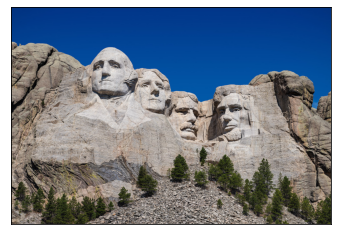

In [16]:
print("Type for the image list: ", type(images))
print("Type for the list's first item: ", type(images[0]))
print("Size of the first image: ", images[0].size())
print("The image: ")

fig = plt.imshow(images[0])

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [17]:
im = images[0]
print(im.size())

torch.Size([1305, 1920, 3])


The image has a size of $[1305, 1920, 3]$, we can then call the first layer as im[:,:,0] which means to take the whole width, the whole height and only the layer 0 of the matrix, such that, 

torch.Size([1305, 1920])


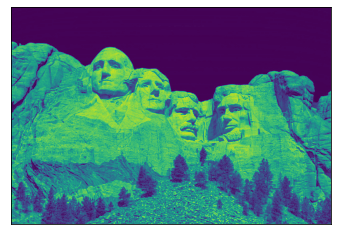

In [18]:
print(im[:,:,0].size())

fig = plt.imshow(im[:,:,0])

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

### Section 2.a Cropping Images

Similarly, we can crop the image using indexing of the rows and columns

torch.Size([700, 920, 3])


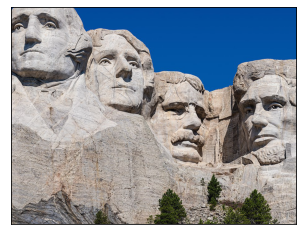

In [19]:
cropped_image = im[300:1000,500:1420,:]

print(cropped_image.size())

fig = plt.imshow(cropped_image)

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)



### Section 2b: Stacking gray images to form color images
Image at index 1, 2 and 3 are grey-scale images of the B, G, and R channels of the original image. They are $N \times M \times 3$, but the three layers have the same values (and hence they are grey-scale). Thus, we want to take one layer from each image and create a new image $N \times M \times 3$.

To run the following cells you will need to implement the ```stack_images(X,Y,Z)``` and ```concat_images(D)``` found in "student_code.py".

test_stack_images(): "Correct"


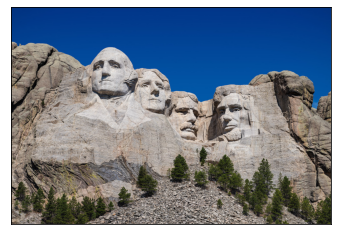

In [20]:
D = sc.stack_images(images[3][:,:,0], images[2][:,:,0], images[1][:,:,0])

fig = plt.imshow(D)

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

print("test_stack_images(): " + verify(test_stack_images))

### Section 2c: Concatenation of color images

Now that you have a color image, we want to create 2x2 block from the same image

test_concat_images(): "Correct"


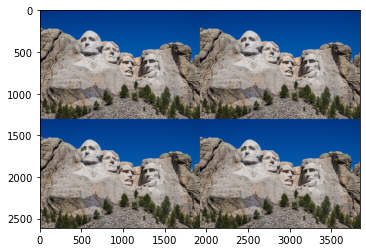

In [21]:
D1 = sc.concat_images(D)

plt.imshow(D1)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
print("test_concat_images(): " + verify(test_concat_images))

# Section 3: Point Operations

For the final part, we will introduce masks. When working on an image, we would like to perform some operation over certain pixel of the image. For example, we would like to delete the sky on the image. Thus we want to identify which pixels are sky. We can create a matrix of equal size as the image $MxN$ and assign a 1 or a 0 depending on a certain condition. The resulting matrix of 1s and 0s is called a mask. 

As the last function that you will have to write is ```create_mask(X, val)``` which take a single layer of an image and a threshold value and creates a mask of the values that are less or equal than val.

test_create_mask(): "Correct"


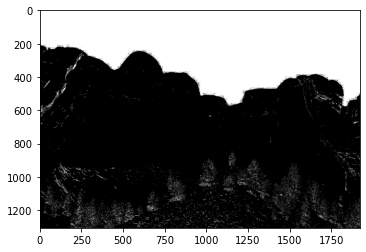

In [22]:
mask = sc.create_mask(images[0][:,:,0], 0.02)
plt.imshow(sc.stack_images(mask,mask,mask)*255)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

print("test_create_mask(): " + verify(test_create_mask))


We are doing a simple threshold, which find most of the pixels that belong to the sky, but it also find some pixel around the image. For this project we won't mind about those pixels.

Once we have the mask, we can use it to modify the respective pixel of the original image. For example, we can increase the values for the sky pixels in the image. 

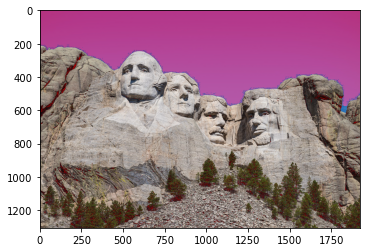

In [23]:
D2 = D.clone()
D2[:,:,0] = D2[:,:,0] + mask.type(torch.FloatTensor)*0.7


plt.imshow(D2)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

# Code Testing

Congrats, you have completed all the portions of this starter project. It is recommended to run all the unit tests using ```pytest``` command from the terminal before. To do this: 

* open the terminal and go to the directory ../proj0_code/
* activate your proj0 environment
* run the command `pytest proj0_unit_tests/`
* On the terminal, you should see a green dot (.) for each unit test passed and an error message for each unit test failed.

Generate the zip folder for the code portion of your submission once you've finished the project using `python zip_submission.py --gt_username <your_gt_username>`.

# Writeup

For this project (and all other projects), you must do a project report using the template slides provided to you at "proj0_template.pptx". Do <u>not</u> change the order of the slides or remove any slides, as this will affect the grading process on Gradescope and you will be deducted points. You must convert the slide deck into a PDF with the name `<your_gt_username.pdf>` for your submission.

# Rubric

* +20 pts: Code
* +10 pts: PDF report
* -2\*n pts: Lose 2 points for every time you do not follow the instructions for the hand-in format.

# Submission

This is very important as you will lose 2 points for every time you do not follow the instructions. You will have two submission files for this project:

1. `<your_gt_username>.zip` via **Gradescope** to 'assigment PS0 - Code'
2. `<your_gt_username>.pdf` via **Gradescope** to 'assignment PS0 - Report'

Do <u>not</u> install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that's not in there by default will probably cause your code to break during grading. Do <u>not</u> use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using `python zip_submission.py --gt_username <your_gt_username>` (it will zip up the appropriate directories/files for you!) and hand it through Gradescope. Remember to submit your report as a PDF to Gradescope as well.

# Credit
Assignment developed by Sergio Aguilera, Arvind Krishnakumar, Ayush Baid, Sen Wang and Frank Dellaert.